# Discussion 2

1/16/25

[link to website](https://maro406.github.io/eds-232-machine-learning/discussion/week2.html)

In [27]:
## Data Loading

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [16]:
# Create and fit ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

# Calcualate MSE and r-squared for Ridge regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print('ridge regression RMSE:', ridge_rmse)
print("ridge regression r^2", ridge_r2)

ridge regression RMSE: 0.14410020171824975
ridge regression r^2 0.9984722762470865


In [21]:
# Create and fit a lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calculate RMSR and r-squared
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print(lasso_rmse)
print(lasso_r2)

1.2984978990079017
0.8759496036905758


In [22]:
# Create function for creating a plot

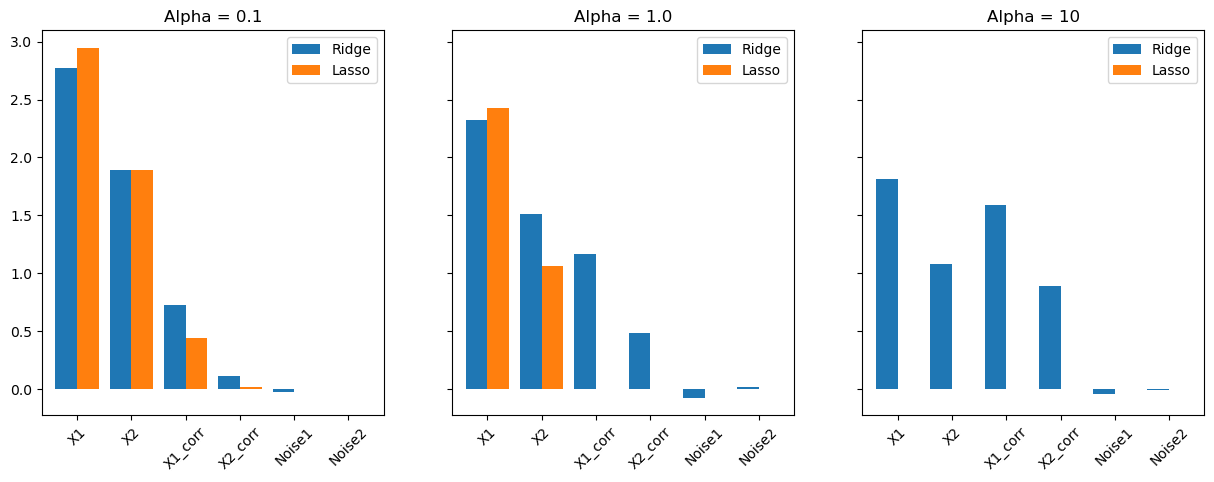

In [36]:
# Make a list of alphas
alphas = [0.1, 1.0, 10]

# Empty list
data = []

# Make a loop
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X, y)
    lasso = Lasso(alpha=alpha).fit(X,y) 
    
    data.append(pd.DataFrame({
        'Ridge': ridge.coef_,
        'Lasso': lasso.coef_
    }, index = ['X1', 'X2', 'X1_corr', 'X2_corr', 'Noise1', "Noise2"])
               )
# Make a plot
fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey= True)

# For loop
for i,df in enumerate(data):
    df.plot.bar(ax= axes[i], width = 0.8)
    axes[i].set_title(f'Alpha = {alphas[i]}')
    axes[i].set_xticklabels(df.index, rotation = 45)
plt.show()


In [61]:
def update_alphas(alpha, model_type):
    if model_type == 'Lasso':
        model = Lasso(alpha = alpha)
    else:
        model = Ridge(alpha = alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # calculate rmse and rsquared
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Plot
    plt.figure(figsize=(10, 5)) 
    plt.scatter(y_test, y_pred, color = 'lightblue', alpha = 0.5, label = f'Predictions (alpha = {alpha})')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth = 2)
    plt.title(f'{model_type} Regression: Predictions vs. Actual (alpha = {alpha})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.figtext(0.5, -0.05, f'RMSE: {rmse}, R2: {r2}', ha = 'center', fontsize =12, bbox = {'facecolor' : "orange"})
    plt.show()
    
# Create interactive widgets
alpha_slider = FloatLogSlider(value = 1.0, base = 10, min = -3, max = 3, description = 'Alpha')
model_selector = {'Lasso Model': 'Lasso',
                  'Ridge Model': 'Ridge'}
interact(update_alphas, alpha = alpha_slider, model_type = model_selector)
    

interactive(children=(FloatLogSlider(value=1.0, description='Alpha', max=3.0, min=-3.0), Dropdown(description=…

<function __main__.update_alphas(alpha, model_type)>